# Лабораторная работа №4.
## Малютин Александр БПМ152.
### Вариант 20.

In [1]:
from sympy.solvers import solve
from sympy import Symbol, diff, sqrt, cos, sin
from scipy.misc import derivative
from numpy.linalg import det

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Задача 4.1. 
Найти с точностью $\epsilon=10^{-6}$ все корни системы нелинейных уравнений:

$f_1(x_1,x_2)=0, \\
f_1(x_1,x_2)=0,$

используя метод Ньютона для системы нелинейных уравнений. Найти корни с помощью встроенного блока решения уравнений Given  Find  пакета MATHCAD.

### ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
1. Используя пакет MATHCAD, локализовать корни системы уравнений графически (см. ПРИЛОЖЕНИЕ 4.В).  
2. Составить программу-функцию, вычисляющую корень системы двух нелинейных уравнений по методу Ньютона с точностью $\epsilon$. Предусмотреть подсчет количества итераций. Для решения соответствующей системы  линейных алгебраических уравнений использовать встроенную функцию lsolve пакета MATHCAD.
3. Используя составленную программу, вычислить все корни заданной системы с точностью $\epsilon$.
4. Используя встроенный блок Given  Find  пакета MATHCAD, найти все корни системы с точностью $\epsilon$ (см. ПРИЛОЖЕНИЕ 4.В). Сравнить с результатами, полученнными в п. 3.

УКАЗАНИЕ. В п. 1 привеcти уравнения системы к виду $x_2=g_i(x_1)$ (либо $x_1=g_i(x_2)$), $i=1,2$, можно с помощью пункта меню Symbolic пакета MATHCAD следующим образом:
 1) набрать уравнение (знак равенства набирается с помощью комбинации клавиш [CTRL] и [=]);
 2) выделить переменную, относительно которой нужно разрешить уравнение, щелкнув на ней мышью;
 3) использовать Symbolic | Solve for Variable.


\begin{array}{lll}
sin(x_1+x_2)-1.5x_1-0.1=0 \\  
3x_1^2+x_2^2-1=0
\end{array}

### Определим функции $f_1(x,y)$ и $f_2(x,y)$ и найдём их частные производные, и составим матрицу Якоби:

In [2]:
epsilon = 1.e-6

class f1:
    def value(x):
        return np.sin(x[0]+x[1])-1.5*x[0]-0.1
    def dx(x):
        return np.cos(x[0]+x[1])-1.5
    def dy(x):
        return np.cos(x[0]+x[1])

class f2:
    def value(x):
        return 3*(x[0]*x[0])+(x[1]*x[1])-1
    def dx(x):
        return 6*x[0]
    def dy(x):
        return 2*x[1]
    
class Jacobian:
    def mat(f, g, x):
        return [[f.dx(x), f.dy(x)],
                [g.dx(x), g.dy(x)]]
    def det(f, g, x):
        return np.linalg.det([[f.dx(x), f.dy(x)],
                              [g.dx(x), g.dy(x)]])
    def inv_mat(f, g, x):
        return np.linalg.inv(
            np.array([[f.dx(x), f.dy(x)],
                      [g.dx(x), g.dy(x)]]))

def Mat2x2Det(a11, a12, a21, a22):
    return np.linalg.det([[a11, a12],
                          [a21, a22]])

### Нарисуем графики наших функций.

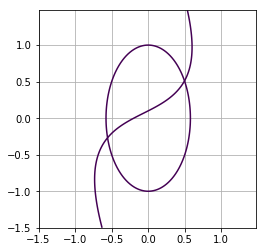

In [3]:
delta = 0.025
xrange = np.arange(-1.5, 1.5, delta)
yrange = np.arange(-1.5, 1.5, delta)

grid = np.meshgrid(xrange, yrange)
F1 = f1.value(grid) 
F2 = f2.value(grid)

plt.contour(grid[0], grid[1], F1, [0])
plt.contour(grid[0], grid[1], F2, [0])

#point = NewtoonMethod(f1, f2, [0,-0.5])[0]
#plt.scatter(point[0], point[1])

plt.grid(True)
plt.axis('scaled')

plt.show()

#### Похоже что область локализации $[0;1]\times[-0.5;1]$

### Определим метод Ньютона:

In [4]:
# TODO
def NewtoonMethod(f1, f2, x, epsilon=1.e-6):
    n = 1
    xn = np.copy(x)
    xprev = np.copy(xn)

    F =  np.array([f1.value(xprev), f2.value(xprev)])
        
    xn = xprev - Jacobian.inv_mat(f1, f2, xprev).dot(F)

    while np.linalg.norm(xn - xprev, ord=np.inf) > epsilon:
        xprev = np.copy(xn)
        
        F = np.array([f1.value(xprev), f2.value(xprev)])
        
        xn = xprev - Jacobian.inv_mat(f1, f2, xprev).dot(F)
        
        n += 1
        
    return xn, n

### Посчитаем корни:

In [5]:
root = NewtoonMethod(f1, f2, [0, 1.1])
p0 = root[0]
root

(array([0.49666048, 0.50988734]), 7)

In [6]:
root = NewtoonMethod(f1, f2, [0, -1.1])
p1 = root[0]
root

(array([-0.55616673, -0.26839467]), 8)

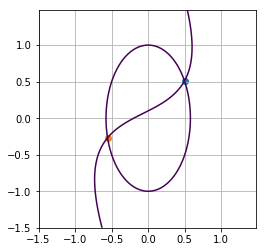

In [7]:
delta = 0.025
xrange = np.arange(-1.5, 1.5, delta)
yrange = np.arange(-1.5, 1.5, delta)

grid = np.meshgrid(xrange, yrange)
F1 = f1.value(grid) 
F2 = f2.value(grid)

plt.contour(grid[0], grid[1], F1, [0])
plt.contour(grid[0], grid[1], F2, [0])

plt.scatter(p0[0], p0[1])
plt.scatter(p1[0], p1[1])

plt.grid(True)
plt.axis('scaled')

plt.show()

## Урааа!! Точки найдены, по графику можно сказать, что ответ на 99% верный